# Heart Disease Data Analysis

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


pd.options.mode.chained_assignment = None  

In [2]:
myDF = pd.read_csv(r"C:\Users\rauns\Downloads\HeartDisease.csv")

In [36]:
myDF.shape

(303, 20)

In [3]:
myDF.head(10)

,age,sex,chestpain,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Variables:
1. Age
2. Sex (1 = Male, 0 = Female)
3. Chest pain type (4 values) The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. Resting Blood Pressure - The person's resting blood pressure (mm Hg on admission to the hospital)
5. serum cholestoral in mg/dl -  The person's cholesterol measurement in mg/dl
6. fasting blood sugar > 120 mg/dl - The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. resting electrocardiographic results (values 0,1,2) - Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thelach - The person's maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest. ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.
11. the slope of the peak exercise ST segment. (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect.  A blood disorder called thalassemia (hereditary)
14. Target : 1 = Yes and 0 = No

In [4]:
myDF.isnull().sum()

age          0
sex          0
chestpain    0
restbp       0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

1    165
0    138
Name: target, dtype: int64


Text(0.5, 1.0, 'Target Distributions:\n  1 = Heart Disease and 0 = No Heart Disease')

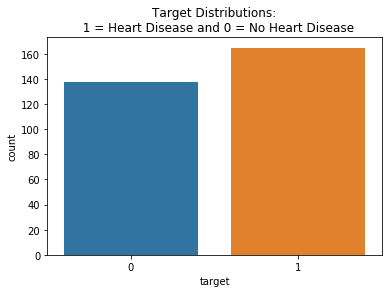

In [5]:
print(myDF["target"].value_counts())
sns.countplot('target', data = myDF)
plt.title('Target Distributions:\n  1 = Heart Disease and 0 = No Heart Disease')

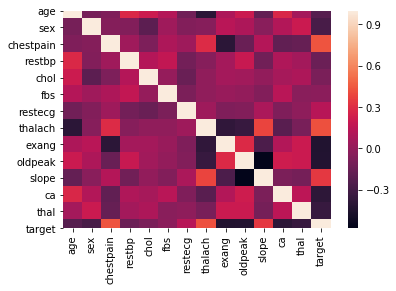

In [6]:
corr = myDF.corr()
sns.heatmap(corr)

Higher Correlations with Target Variable:
    - Chest pain
    - thalach (maximum heart rate achieved)
    - slope (slope of the peak exercise ST segment)
    - restecg (resting electrocardiographic results)

Heatmap doesnt tell us much in this instance

In [7]:
myDF.groupby('target').mean()

,age,sex,chestpain,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


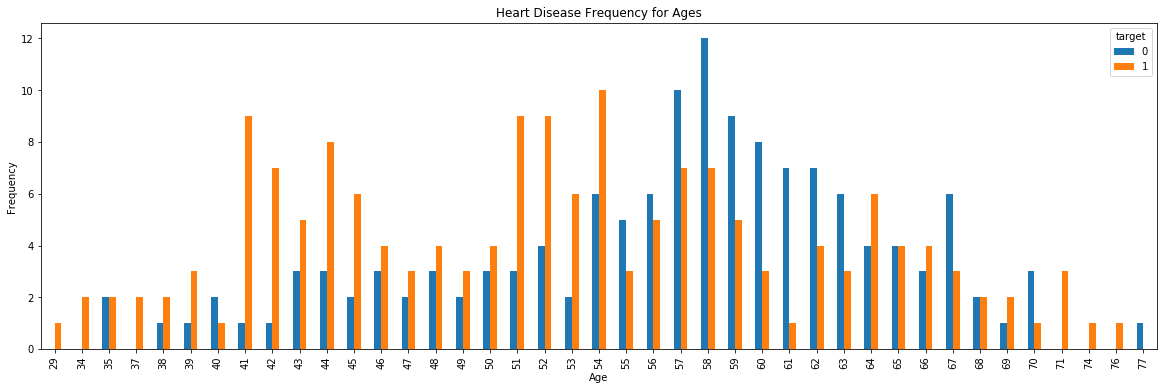

In [8]:
pd.crosstab(myDF['age'], myDF['target']).plot(kind="bar",figsize=(20,6)) # crosstab used to measure frequency
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

target    0   1
sex            
0        24  72
1       114  93


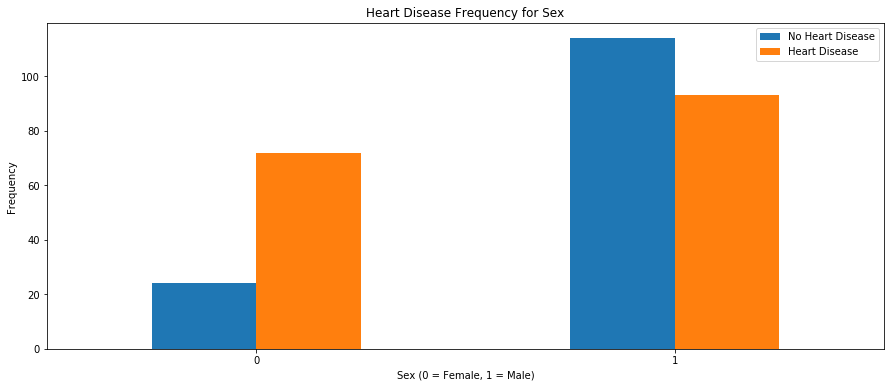

In [9]:
print(pd.crosstab(myDF['sex'], myDF['target']))
pd.crosstab(myDF['sex'], myDF['target']).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.ylabel('Frequency')
plt.show()

target       0   1
chestpain         
0          104  39
1            9  41
2           18  69
3            7  16


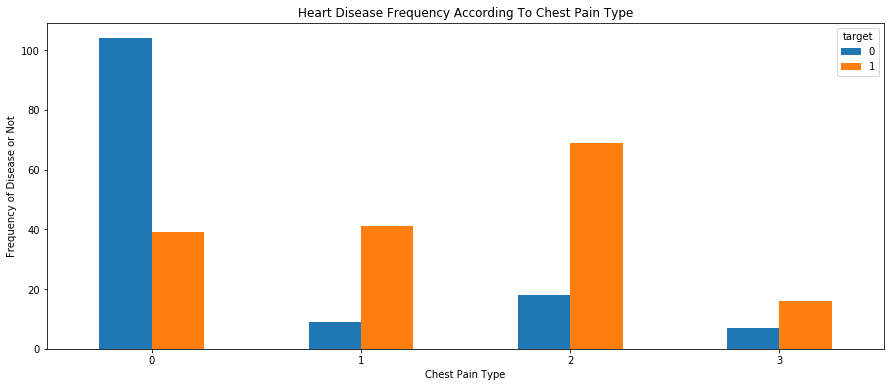

In [10]:
print(pd.crosstab(myDF['chestpain'], myDF['target']))
pd.crosstab(myDF['chestpain'], myDF['target']).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Heart Disease Risk Factors (from online research)

- chest pains
- age (aging puts risk of narrowed arteries and weakened muscle)
- sex (men are typically higher risk)
- family history 
- smoking
- high blood pressure

Source: https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

### Preprocess Data and Building the Model

In [11]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

In [12]:
# separating columns for more detail in identifying 
myDF.columns = ['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'fasting_blood_sugar', 
                'resting_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 
                'num_major_vessels', 'thalassemia', 'target']

In [13]:
# classifying as male or female
myDF['sex'][myDF['sex'] == 0] = 'female'
myDF['sex'][myDF['sex'] == 1] = 'male'

In [14]:
# classify the type of chest pain
myDF['chest_pain_type'][myDF['chest_pain_type'] == 1] = 'typical angina'
myDF['chest_pain_type'][myDF['chest_pain_type'] == 2] = 'atypical angina'
myDF['chest_pain_type'][myDF['chest_pain_type'] == 3] = 'non-anginal pain'
myDF['chest_pain_type'][myDF['chest_pain_type'] == 4] = 'asymptomatic'

In [15]:
# separate blood sugar into less than 120 and greater than 120 mg/ml
myDF['fasting_blood_sugar'][myDF['fasting_blood_sugar'] == 0] = 'lower than 120 mg/ml'
myDF['fasting_blood_sugar'][myDF['fasting_blood_sugar'] == 1] = 'greater than 120 mg/ml'

In [16]:
# classify the type of resting ecg
myDF['resting_ecg'][myDF['resting_ecg'] == 0] = 'normal'
myDF['resting_ecg'][myDF['resting_ecg'] == 1] = 'ST-T wave abnormality'
myDF['resting_ecg'][myDF['resting_ecg'] == 2] = 'left ventricular hypertrophy'

In [17]:
# seperate if angina was induced by exercise or not
myDF['exercise_induced_angina'][myDF['exercise_induced_angina'] == 0] = 'no'
myDF['exercise_induced_angina'][myDF['exercise_induced_angina'] == 1] = 'yes'

In [18]:
# classify the slope of the peak exercise ST segment
myDF['st_slope'][myDF['st_slope'] == 1] = 'upsloping'
myDF['st_slope'][myDF['st_slope'] == 2] = 'flat'
myDF['st_slope'][myDF['st_slope'] == 3] = 'downsloping'

In [19]:
# what type of thalassemia was it
myDF['thalassemia'][myDF['thalassemia'] == 1] = 'normal'
myDF['thalassemia'][myDF['thalassemia'] == 2] = 'fixed defect'
myDF['thalassemia'][myDF['thalassemia'] == 3] = 'reversable defect'

In [20]:
# change data types to apply model to data
myDF['sex'] = myDF['sex'].astype('object')
myDF['chest_pain_type'] = myDF['chest_pain_type'].astype('object')
myDF['fasting_blood_sugar'] = myDF['fasting_blood_sugar'].astype('object')
myDF['resting_ecg'] = myDF['resting_ecg'].astype('object')
myDF['exercise_induced_angina'] = myDF['exercise_induced_angina'].astype('object')
myDF['st_slope'] = myDF['st_slope'].astype('object')
myDF['thalassemia'] = myDF['thalassemia'].astype('object')

In [21]:
# introduce dummy variables to make data categorial
# A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value
myDF = pd.get_dummies(myDF, drop_first=True)

In [22]:
myDF.head(10)

,age,resting_bp,cholesterol,max_heart_rate,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120 mg/ml,resting_ecg_left ventricular hypertrophy,resting_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0
5,57,140,192,148,0.4,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
6,56,140,294,153,1.3,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0
7,44,120,263,173,0.0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
8,52,172,199,162,0.5,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1
9,57,150,168,174,1.6,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(myDF.drop('target', 1), 
                                                    myDF['target'], 
                                                    test_size = 0.2, 
                                                    random_state = 10) 

In [24]:
model = RandomForestClassifier(max_depth = 5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [25]:
y_pred = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [26]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[28,  7],
       [ 4, 22]], dtype=int64)

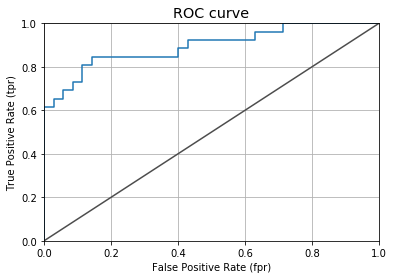

In [27]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.grid(True)

In [28]:
# AUC score
auc(fpr, tpr)

0.8956043956043956

In [31]:
newDF = myDF.copy()
newDF['Prediction'] = model.predict(newDF.drop('target', 1))
newDF.head(10)

,age,resting_bp,cholesterol,max_heart_rate,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,...,fasting_blood_sugar_lower than 120 mg/ml,resting_ecg_left ventricular hypertrophy,resting_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,Prediction
0,63,145,233,150,2.3,0,1,1,0,1,...,0,0,1,0,0,0,0,1,0,1
1,37,130,250,187,3.5,0,1,1,1,0,...,1,0,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1
3,56,120,236,178,0.8,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,1
4,57,120,354,163,0.6,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
5,57,140,192,148,0.4,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,1
6,56,140,294,153,1.3,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,1
7,44,120,263,173,0.0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,1
8,52,172,199,162,0.5,0,1,1,1,0,...,0,0,0,0,1,0,0,0,1,1
9,57,150,168,174,1.6,0,1,1,1,0,...,1,0,0,0,1,0,1,0,0,1


In [34]:
newDF['Match?'] = np.where(newDF['target'] == newDF['Prediction'], 'True', 'False')
newDF.head()

,age,resting_bp,cholesterol,max_heart_rate,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,...,resting_ecg_left ventricular hypertrophy,resting_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,Prediction,Match?
0,63,145,233,150,2.3,0,1,1,0,1,...,0,1,0,0,0,0,1,0,1,True
1,37,130,250,187,3.5,0,1,1,1,0,...,0,0,0,0,0,1,0,0,1,True
2,41,130,204,172,1.4,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,True
3,56,120,236,178,0.8,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,True
4,57,120,354,163,0.6,0,1,0,0,0,...,0,0,1,1,0,1,0,0,1,True


In [35]:
newDF['Match?'].value_counts()

True     280
False     23
Name: Match?, dtype: int64

Random Forest model predicted 92.4% accuracy on heart disease

### Which Features had the most affect on heart disease?

In [29]:
import eli5 
from eli5.sklearn import PermutationImportance

C:\Users\rauns\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\rauns\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Permutation Importance: https://www.kaggle.com/dansbecker/permutation-importance

In [30]:
perm = PermutationImportance(model, random_state=10).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0426 ± 0.0445,thalassemia_fixed defect
0.0328 ± 0.0549,num_major_vessels
0.0262 ± 0.0161,thalassemia_reversable defect
0.0197 ± 0.0435,max_heart_rate
0.0131 ± 0.0131,age
0.0098 ± 0.0334,chest_pain_type_atypical angina
0.0066 ± 0.0262,exercise_induced_angina_yes
0.0066 ± 0.0334,st_depression
0.0066 ± 0.0334,cholesterol
0.0033 ± 0.0131,fasting_blood_sugar_lower than 120 mg/ml


Top:
    - thalassemia - fixed defect
    - thalassemia - reversable defect
    - number of major vessels
    - max heart rate
    - age